In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quickdraw-doodle-recognition/sample_submission.csv
/kaggle/input/quickdraw-doodle-recognition/test_raw.csv
/kaggle/input/quickdraw-doodle-recognition/test_simplified.csv
/kaggle/input/quickdraw-doodle-recognition/train_simplified/traffic light.csv
/kaggle/input/quickdraw-doodle-recognition/train_simplified/rhinoceros.csv
/kaggle/input/quickdraw-doodle-recognition/train_simplified/bed.csv
/kaggle/input/quickdraw-doodle-recognition/train_simplified/school bus.csv
/kaggle/input/quickdraw-doodle-recognition/train_simplified/van.csv
/kaggle/input/quickdraw-doodle-recognition/train_simplified/octopus.csv
/kaggle/input/quickdraw-doodle-recognition/train_simplified/firetruck.csv
/kaggle/input/quickdraw-doodle-recognition/train_simplified/laptop.csv
/kaggle/input/quickdraw-doodle-recognition/train_simplified/tractor.csv
/kaggle/input/quickdraw-doodle-recognition/train_simplified/matches.csv
/kaggle/input/quickdraw-doodle-recognition/train_simplified/windmill.csv
/kaggle/input/quic

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img


In [8]:
import pandas as pd

# Inspect the first CSV file (for example 'traffic light.csv')
csv_file = '/kaggle/input/quickdraw-doodle-recognition/train_simplified/traffic light.csv'
df = pd.read_csv(csv_file)

# Display the first few rows to check the column names
print(df.head())


  countrycode                                            drawing  \
0          US  [[[0, 29, 48, 168, 169, 144, 124, 121, 71, 3],...   
1          UA  [[[26, 24, 9, 0, 1, 27, 60, 102, 105, 120, 134...   
2          JP  [[[4, 1, 0, 5], [0, 5, 45, 119]], [[11, 13, 26...   
3          US  [[[5, 9, 17, 31, 100, 178, 179, 171, 171, 170,...   
4          US  [[[0, 2, 0, 117, 120, 119, 110, 110, 103, 94, ...   

             key_id  recognized                   timestamp           word  
0  6516695600463872        True  2017-03-12 19:14:45.275810  traffic light  
1  5126103083515904        True  2017-03-17 15:35:33.751320  traffic light  
2  5539191448403968        True  2017-01-24 08:36:15.019760  traffic light  
3  5814321797922816        True  2017-03-17 23:53:51.549670  traffic light  
4  4556639560531968        True  2017-03-05 00:51:31.892710  traffic light  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1093/1093 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.0977 - loss: 2.3027 - val_accuracy: 0.0964 - val_loss: 2.3027
Epoch 2/50
   1/1093 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0938 - loss: 2.3053

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - accuracy: 0.0938 - loss: 2.3053 - val_accuracy: 0.0964 - val_loss: 2.3027
Epoch 3/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.0996 - loss: 2.3028 - val_accuracy: 0.0964 - val_loss: 2.3028
Epoch 4/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.0625 - loss: 2.3034 - val_accuracy: 0.0964 - val_loss: 2.3028
Epoch 5/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.1014 - loss: 2.3027 - val_accuracy: 0.1005 - val_loss: 2.3027
Epoch 6/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.1250 - loss: 2.2998 - val_accuracy: 0.1005 - val_loss: 2.3027
Epoch 7/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.0983 - loss: 2.3027 - val_accuracy: 0.0991 - val_loss: 2.3028
Epoch 8/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.0000e+00 - loss: 2.3045 - val_accuracy: 0.0991 - val_loss: 2.3028
Epoch 9/50
1093/1093 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.0985 - loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


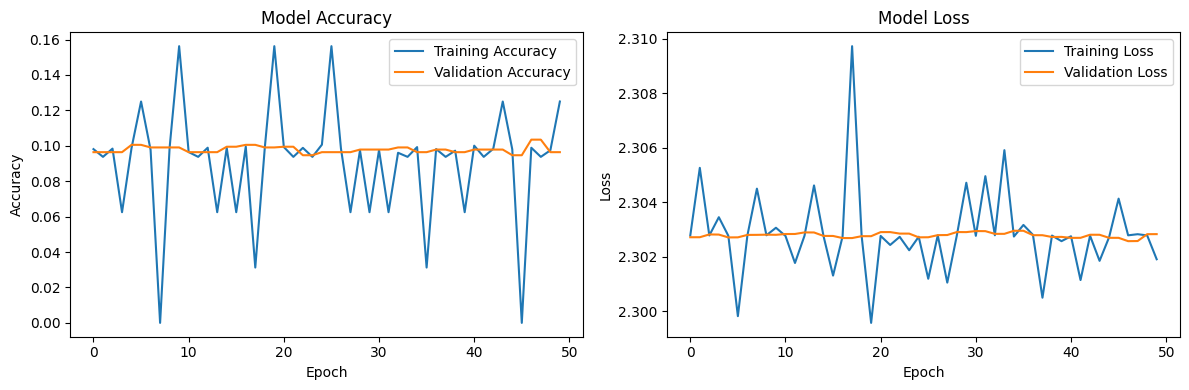

ValueError: The input must have 3 channels; Received `input_shape=(28, 28, 1)`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Data Loading and Preprocessing
def load_doodle_data(data_dir, num_classes=10, samples_per_class=5000):
    """
    Load doodle data from CSV files in the specified directory.
    
    Parameters:
    - data_dir: Directory containing CSV files
    - num_classes: Number of classes to load
    - samples_per_class: Number of samples to load per class
    
    Returns:
    - X: Image data (numpy array)
    - y: Labels (numpy array)
    """
    # Get list of CSV files
    csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')][:num_classes]
    
    X, y = [], []
    
    for file in csv_files:
        # Read CSV file
        df = pd.read_csv(os.path.join(data_dir, file))
        
        # Extract class name from filename
        class_name = file.replace('.csv', '')
        
        # Take limited samples
        df_subset = df.head(samples_per_class)
        
        # Convert drawing data to image
        for drawing in df_subset['drawing']:
            # Assuming drawing is a string of coordinates
            # This is a placeholder - you'll need to implement actual drawing conversion
            img = parse_drawing(drawing)
            X.append(img)
            y.append(class_name)
    
    return np.array(X), np.array(y)

def parse_drawing(drawing_str):
    """
    Convert drawing string to image (placeholder implementation)
    
    Parameters:
    - drawing_str: String representation of drawing coordinates
    
    Returns:
    - img: Numpy array representing the image
    """
    # Placeholder: Create a blank image
    # In actual implementation, you'd parse the drawing coordinates
    return np.zeros((28, 28), dtype=np.float32)

def preprocess_data(X, y):
    """
    Preprocess image data and labels
    
    Parameters:
    - X: Image data
    - y: Labels
    
    Returns:
    - X_processed: Preprocessed image data
    - y_processed: One-hot encoded labels
    """
    # Reshape images
    X_processed = X.reshape(-1, 28, 28, 1)
    
    # Normalize pixel values
    X_processed = X_processed / 255.0
    
    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    y_processed = to_categorical(y_encoded)
    
    return X_processed, y_processed, label_encoder

def create_cnn_model(input_shape, num_classes):
    """
    Create a custom Convolutional Neural Network
    
    Parameters:
    - input_shape: Shape of input images
    - num_classes: Number of output classes
    
    Returns:
    - model: Compiled Keras model
    """
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        
        # Flatten and dense layers
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

def transfer_learning_model(input_shape, num_classes):
    """
    Create a transfer learning model using VGG16
    
    Parameters:
    - input_shape: Shape of input images
    - num_classes: Number of output classes
    
    Returns:
    - model: Compiled Keras model
    """
    # Load pre-trained VGG16 model
    base_model = VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=input_shape)
    
    # Freeze base model layers
    base_model.trainable = False
    
    # Add custom layers
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

def train_model(model, X_train, y_train, X_val, y_val):
    """
    Train the model with data augmentation
    
    Parameters:
    - model: Keras model to train
    - X_train, y_train: Training data and labels
    - X_val, y_val: Validation data and labels
    
    Returns:
    - history: Training history
    """
    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1
    )
    
    # Train the model
    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=32),
        epochs=50,
        validation_data=(X_val, y_val),
        steps_per_epoch=len(X_train) // 32
    )
    
    return history

def evaluate_model(model, X_test, y_test):
    """
    Evaluate model performance
    
    Parameters:
    - model: Trained Keras model
    - X_test, y_test: Test data and labels
    
    Returns:
    - Evaluation metrics
    """
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # Confusion Matrix
    from sklearn.metrics import confusion_matrix, classification_report
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    print("\nConfusion Matrix:")
    print(cm)
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true_classes, y_pred_classes))

def plot_training_history(history):
    """
    Plot training and validation accuracy/loss
    
    Parameters:
    - history: Model training history
    """
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Main Execution
def main():
    # Data directory
    data_dir = '/kaggle/input/quickdraw-doodle-recognition/train_simplified'
    
    # Load data
    X, y = load_doodle_data(data_dir)
    
    # Preprocess data
    X_processed, y_processed, label_encoder = preprocess_data(X, y)
    
    # Split data
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_processed, y_processed, test_size=0.3, random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42
    )
    
    # Create and train custom CNN
    custom_cnn = create_cnn_model(X_train.shape[1:], y_processed.shape[1])
    custom_history = train_model(custom_cnn, X_train, y_train, X_val, y_val)
    
    # Evaluate custom CNN
    print("Custom CNN Performance:")
    evaluate_model(custom_cnn, X_test, y_test)
    plot_training_history(custom_history)
    
    # Create and train transfer learning model
    transfer_model = transfer_learning_model(X_train.shape[1:], y_processed.shape[1])
    transfer_history = train_model(transfer_model, X_train, y_train, X_val, y_val)
    
    # Evaluate transfer learning model
    print("\nTransfer Learning Model Performance:")
    evaluate_model(transfer_model, X_test, y_test)
    plot_training_history(transfer_history)

if __name__ == '__main__':
    main()